In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
Iris=pd.read_csv('Iris.csv')


In [42]:
print("The dimension of the dataset is:",Iris.shape)
print("The dimension of the variables in the data set are:\n",Iris.columns)

The dimension of the dataset is: (150, 6)
The dimension of the variables in the data set are:
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [44]:
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [46]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [48]:
Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [50]:
x=Iris.iloc[:,1:5]

In [54]:
x.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
y=Iris.iloc[:,5]

In [13]:
y=Iris[['Species']]


In [15]:
y.head(5)


,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [17]:
y.sample(5)


,Species
98,Iris-versicolor
67,Iris-versicolor
138,Iris-virginica
112,Iris-virginica
29,Iris-setosa


In [19]:
y.tail(5)

,Species
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica
149,Iris-virginica


In [11]:
y.head(5)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [60]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # 70% training and 30% test


In [62]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [64]:
print("----New Decision Tree Model---")
clf_information_gain=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)
clf_information_gain.fit(x_train,y_train)

----New Decision Tree Model---


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [66]:
y_pred_entropy=clf_information_gain.predict(x_test)

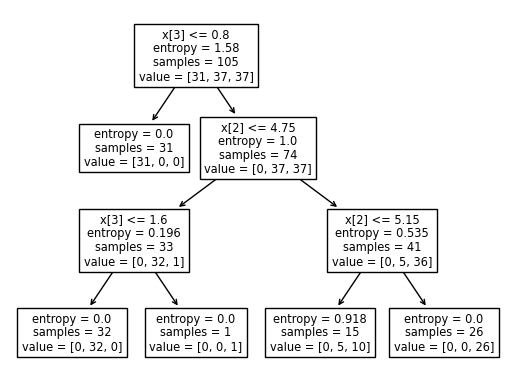

In [68]:
from sklearn.tree import plot_tree
plot_tree(clf_information_gain)
plt.show()

[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.25, 0.375, 'x[3] <= 1.6\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[2] <= 5.15\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

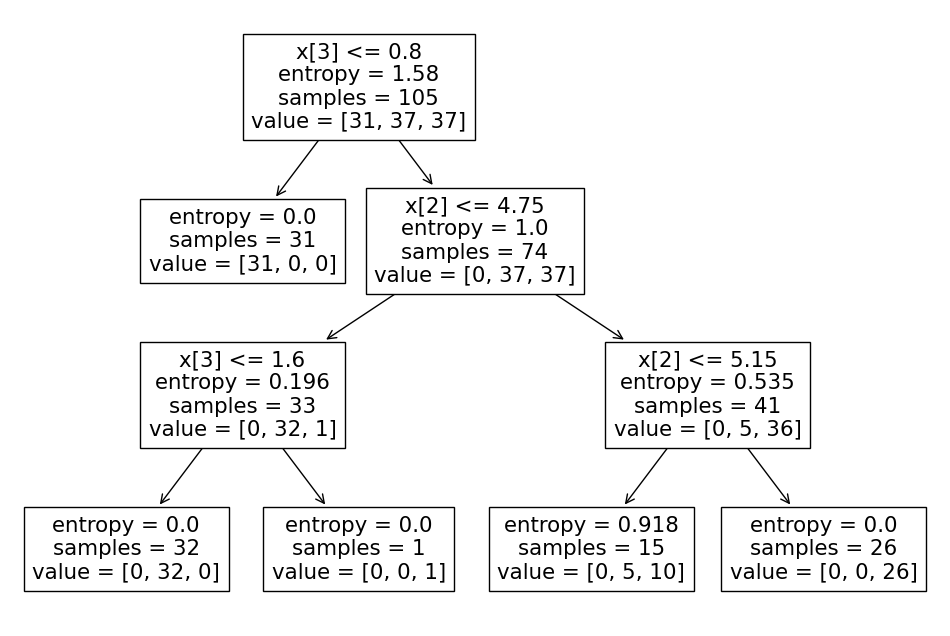

In [70]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_information_gain.fit(x_train,y_train))

In [72]:
print("Accuracy on training set of iris data set is:%0.4f"%clf_information_gain.score(x_train,y_train))
print("Accuracy on testing set of testing data set is:%0.4f"%clf_information_gain.score(x_test,y_test))


Accuracy on training set of iris data set is:0.9524
Accuracy on testing set of testing data set is:0.9778


In [74]:
print("The importance of the features of tree model is:\n")
importance=clf_information_gain.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature:%0d, Score: %0.4f' %(i,v))

The importance of the features of tree model is:

Feature:0, Score: 0.0000
Feature:1, Score: 0.0000
Feature:2, Score: 0.3534
Feature:3, Score: 0.6466


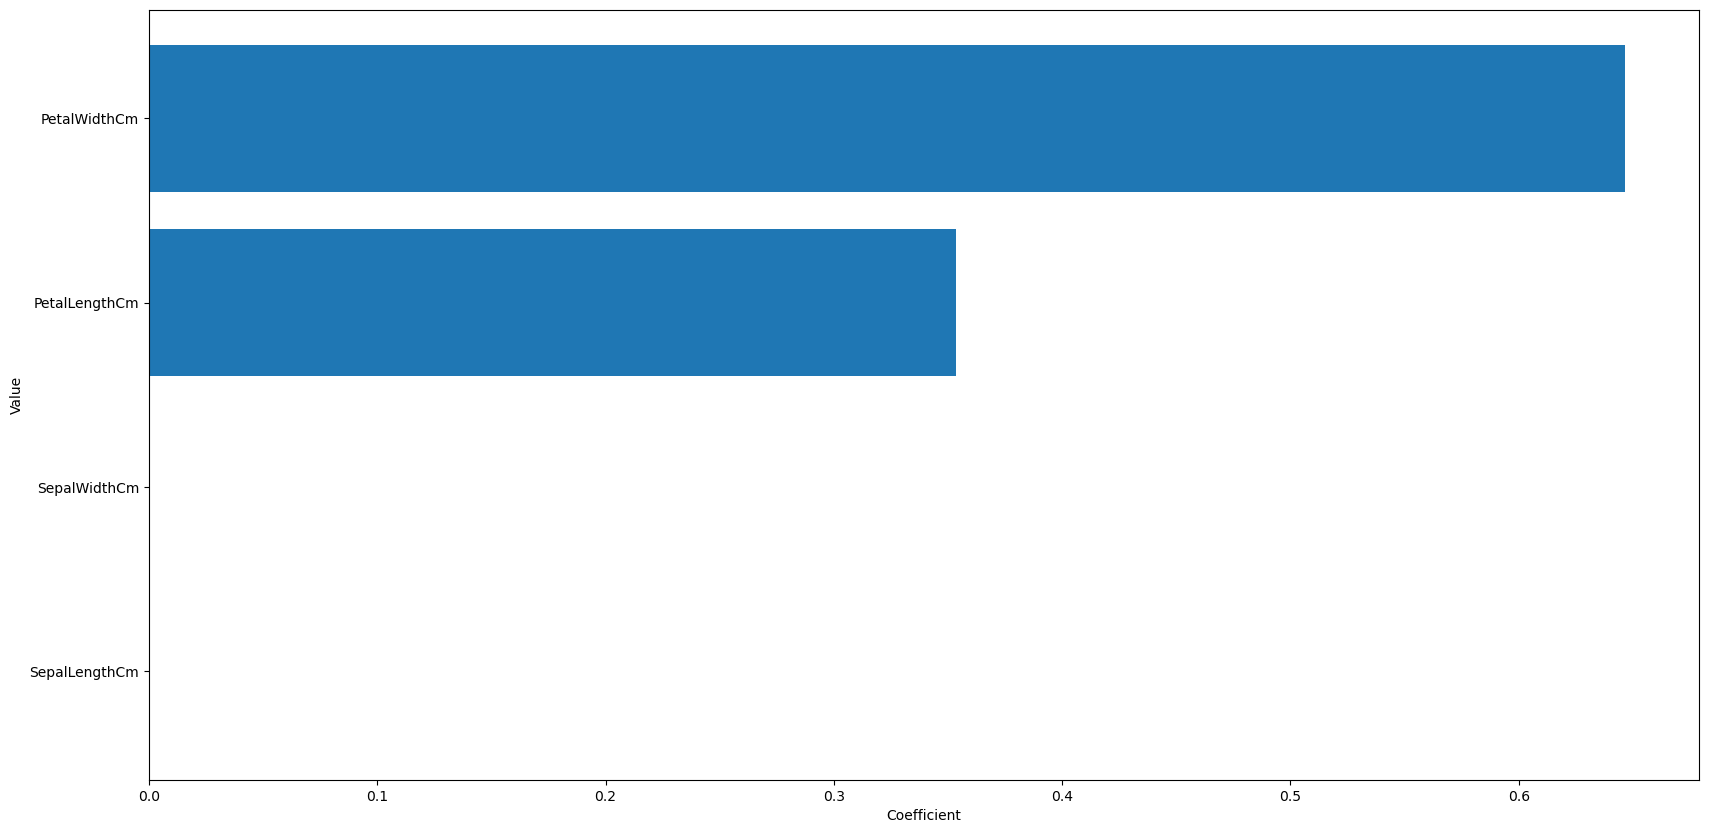

In [78]:
plt.figure(1,figsize=(20,10))
plt.yticks(range(1,5),x_train.columns)
plt.barh(range(1,5),clf_information_gain.feature_importances_,align='center')
plt.xlabel("Coefficient")
plt.ylabel("Value")
plt.show()

In [80]:
irispred2=clf_information_gain.predict(x_test)
irisacc_score2=accuracy_score(y_test,irispred2)
irisresults2=confusion_matrix(y_test,irispred2)
print("The accuracy of Decision Tree model is:%0.4f" % irisacc_score2)
print("The confusion matrix is:\n",irisresults2)

The accuracy of Decision Tree model is:0.9778
The confusion matrix is:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [82]:
irispred2

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [ ]:
#print("Decision Tree with important predictor variables-------")

In [ ]:
#x_trg=x_trg.drop(columns=['x8','x2','x5','x4','x3','x6'],axis=1)
#x_test=x_test.drop(columns=['x8','x2','x5','x4','x3','x6'],axis=1)


In [ ]:
#treefertilitynew=DecisionTreeClassifier(max_depth=3,random_state=0)
#treefertilitynew.fit(x_trg,y_trg)
#treeprednew=treefertilitynew.predict(x_test)
#treeacc_scorenew=confusion_matrix(y_test,treeprednew)
#treeresultsnew=confusion_matrix(y_test,treeprednew) 
#print("The accuracy of Decision Tree model is %0.4f" %treeacc_scorenew)
#print("The confusion matrix is :\n",treeresultsnew)



In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix

# # Fit the model
# irisfertilitynew = DecisionTreeClassifier(max_depth=3, random_state=0)
# irisfertilitynew.fit(x_train, y_train)

# # Make predictions
# irisprednew = irisfertilitynew.predict(x_test)

# # Calculate the confusion matrix
# irisresultsnew = confusion_matrix(y_test, irisprednew)

# # Calculate accuracy
# irisacc_scorenew = accuracy_score(y_test, irisprednew)

# # Print results
# print("The accuracy of Decision Tree model is %0.4f" % irisacc_scorenew)
# print("The confusion matrix is :\n", irisresultsnew)


In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 500x500 with 0 Axes>

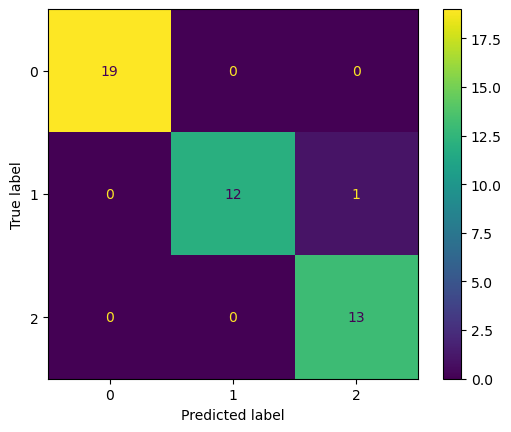

In [86]:
plt.figure(figsize=(5,5))
ConfusionMatrixDisplay(irisresults2).plot()
plt.show()